In [11]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [12]:
df = pd.read_csv("../processed_data/2018_Data_Accounts.csv")

# convert 'Name' column into row indices
df.set_index('Name', inplace=True)

# remove ticker column
df = df.drop(columns=['Ticker'])

# display
display(df)

,Revenue,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Free Cash Flow,Market Cap,Enterprise Value,Working Capital,2019 PRICE VAR [%],Class
Name,,,,,,,,,,,,,,,,,,,,,
Comcast Corporation,6.323475,-0.316696,16.416107,-0.158625,17.261727,17.384583,11.478611,14.515810,9.775665,8.563799,...,18.551872,-6.246506,-7.472656,15.388109,9.286260,7.256458,9.706136,-4.157145,0.272457,0.766672
Sirius XM Holdings Inc.,0.030446,-0.108048,0.288030,0.791809,0.060087,0.099691,0.746462,1.084121,0.643699,0.377755,...,-0.046505,-1.333279,-0.184554,-0.769809,0.909300,0.919989,0.897186,-1.822499,0.101756,0.766672
"Caesars Entertainment, Inc.",0.216274,0.061176,0.420518,-0.158625,0.271835,0.506456,0.132946,5.275000,-0.182470,-0.577006,...,0.204339,-0.095345,0.281416,0.252015,-0.134760,-0.098078,0.505200,-0.059603,1.295726,0.766672
Ford Motor Company,10.992098,12.854323,2.262109,-0.158625,2.793410,2.365166,1.663089,4.778454,2.582381,1.436007,...,1.502671,0.077599,-6.438625,0.015751,5.483897,1.167930,5.422933,12.746919,0.155944,0.766672
"NIKE, Inc.",2.202412,1.530728,2.501254,-0.158625,2.822662,2.390474,2.434371,-0.161760,2.581047,5.984218,...,-0.116395,-4.039938,-2.593975,-2.641791,2.835536,5.339784,4.032573,5.949899,0.359933,0.766672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Takung Art Co., Ltd.",-0.378199,-0.316463,-0.324211,-0.158625,-0.291735,-0.303959,-0.330107,-0.386579,-0.309281,-0.262339,...,-0.107708,0.278753,0.281416,0.085067,-0.330657,-0.320130,-0.332647,-0.234363,-0.732742,-1.304338
"Urban One, Inc.",-0.347661,-0.305365,-0.269683,-0.158625,-0.244763,-0.250644,-0.280242,-0.066377,-0.302374,-0.623371,...,-0.135538,0.267529,0.281416,0.042056,-0.275066,-0.315699,-0.294470,-0.197830,-0.315203,-1.304338
Vince Holding Corp.,-0.359470,-0.303067,-0.303684,-0.158625,-0.257098,-0.274074,-0.337347,-0.365681,-0.265166,-0.262579,...,-0.108338,0.314290,0.281416,0.100423,-0.346782,-0.316220,-0.327465,-0.215203,0.862381,0.766672


In [13]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++')
kmeans.fit(df)

KMeans()

In [14]:
kmeans.inertia_

3995.269012690267

C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

Text(0, 0.5, 'Inertia')

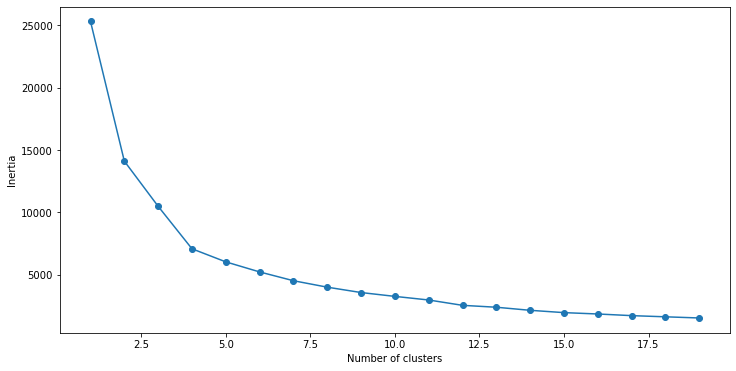

In [15]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [16]:
numclus = 8
kmeans = KMeans(n_jobs = -1, n_clusters = numclus, init = 'k-means++')
kmeans.fit(df)
labels = kmeans.predict(df)

C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [17]:
frame = pd.DataFrame(df)
frame['cluster'] = labels
frame['cluster'].value_counts()

7    197
0    126
6     47
3      6
4      2
5      1
2      1
1      1
Name: cluster, dtype: int64

In [18]:
print(kmeans.cluster_centers_)

[[-2.67598474e-01 -2.22589378e-01 -2.31939945e-01 -9.30373248e-02
  -2.00732351e-01 -2.05741758e-01 -2.66975723e-01 -2.62423209e-01
  -2.62304123e-01 -2.12427413e-01 -2.61031806e-01 -6.30083369e-02
  -2.60865852e-01 -2.59767909e-01 -2.72847717e-01 -2.62751332e-01
  -1.96117294e-01 -9.24986781e-02 -1.67594246e-01 -1.11668236e-01
  -2.79302398e-01 -1.91271830e-01 -2.28869365e-01 -1.38686208e-01
  -1.13642755e-01 -8.98853503e-02 -2.06827401e-01 -2.14454068e-01
  -2.37378526e-01 -1.08923408e-01 -1.87404857e-01 -2.08041923e-01
  -1.91546949e-01 -1.22264593e-01 -1.16883416e-01 -9.19415758e-02
  -2.02101692e-01 -2.04846320e-01  1.89081721e-01 -1.88894763e-01
  -2.08268642e-01 -1.07903777e-01 -1.88355915e-01  5.70306175e-02
  -2.17910974e-01 -1.88104486e-01 -2.37801895e-01 -2.43862824e-01
   2.12292031e-01  6.47928564e-02  3.07196350e-02  1.20258915e-01
  -8.58559714e-02  2.41782951e-01  2.26010349e-01  7.83457158e-02
  -2.43150209e-01 -2.58445802e-01 -2.68628281e-01 -8.50082655e-02
  -7.11165

In [19]:
print(kmeans.labels_) # respective cluster for each company (company at index 1 is in cluster 1)

[2 6 6 1 3 5 3 6 7 0 4 6 0 6 6 3 0 7 6 7 0 3 6 4 0 6 7 7 6 6 0 6 7 7 7 7 7
 7 6 6 7 6 6 7 0 6 6 7 6 0 7 6 7 6 7 6 7 0 6 6 6 0 7 0 7 6 7 0 7 0 7 0 0 7
 7 6 0 7 7 7 7 7 6 7 7 6 0 7 6 7 7 7 6 3 0 0 7 7 0 7 7 0 7 7 0 0 6 7 6 7 7
 7 6 7 7 7 0 7 0 7 7 7 6 6 7 7 6 0 0 7 7 0 7 7 7 6 7 0 0 7 7 7 0 0 7 6 0 7
 0 7 7 7 7 6 0 0 6 7 0 7 6 0 7 7 7 0 7 0 0 7 7 7 7 6 0 7 7 0 7 7 7 7 7 7 7
 7 7 7 0 0 0 7 7 7 7 7 0 0 7 7 7 7 0 0 0 6 0 0 7 0 7 7 0 7 7 7 7 0 0 7 7 0
 7 0 0 3 7 7 0 7 7 7 0 7 6 7 7 7 7 7 6 0 7 7 0 0 7 0 7 7 7 7 7 6 7 0 7 7 0
 0 7 7 0 7 7 7 7 7 0 7 0 0 7 0 7 0 7 0 0 0 7 0 7 0 0 7 0 0 7 7 0 7 0 0 0 7
 7 7 0 7 7 7 7 0 7 7 0 0 7 7 7 0 0 0 0 0 7 7 0 7 7 0 7 0 7 7 7 7 7 7 7 7 7
 7 7 0 0 7 0 7 0 7 7 7 0 7 0 7 7 0 0 0 7 7 0 0 7 7 0 7 0 0 0 0 0 0 0 7 0 7
 0 7 0 0 0 0 0 0 7 7 7]
